In [1]:
# Подключаем используемые библиотеки
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np

from ridge_regressor import RidgeRegression
from math_lib import sse

In [2]:
# Генерируем тренировочные данные
n = 100 # Количество вопросов / ответов
x = np.linspace(-np.pi, np.pi, n) # Вопросы
y = 2 * np.sin(x) + 3 * np.cos(x) # Ответы
y_noise = y + 0.5 * np.random.normal(size=n) # Приблизительные ответы (с шумом)

[Ridge Regression]
SSE 40.54630605019643
[Ridge Regression]
SSE 211.05034734214118


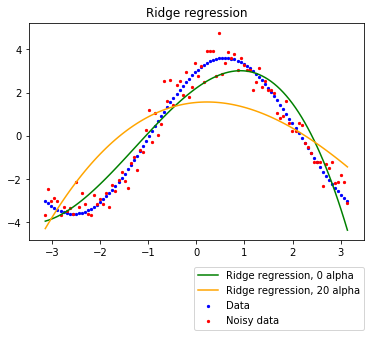

In [3]:
# Выводим оригинальные данные (ответы) и данные с шумом
plt.scatter(x, y, s=5, label='Data', color='BLUE')
plt.scatter(x, y_noise, s=5, label='Noisy data', color='RED')

# Получаем транспонированную матрицу
tX = np.array([x]).T
# Возводим матрицу в степень 2 и в степень 3 и обьединяем их все
tX = np.hstack((tX, np.power(tX, 2), np.power(tX, 3)))

r = RidgeRegression()
# Генерируем данные с коэффициентом 0
r.fit(tX, y_noise, 0)
result = r.predict(tX)
plt.plot(x, result, 'b', label='Ridge regression, 0 alpha', color='GREEN')

print("[Ridge Regression]")
print("SSE %r" % sse(y, result))

# Генерируем данные с коэффициентом 20
r.fit(tX, y_noise, 20)
result1 = r.predict(tX)
plt.plot(x, result1, 'b', label='Ridge regression, 20 alpha', color='ORANGE')

print("[Ridge Regression]")
print("SSE %r" % sse(y, result1))

plt.legend(bbox_to_anchor=(1.017, -0.1))
plt.title("Ridge regression")
plt.show()


In [4]:
# Как видно на текущей выборке чем выше коэффициент Alpha тем выше среднеквадратическая погрешность.